0.049984407218554114


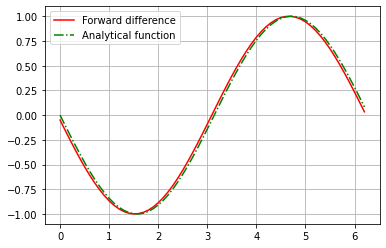

In [1]:
import numpy as np
import matplotlib.pyplot as plt
#step size
h=0.1
x=np.arange(0,2*np.pi,h)
#our function

def f(x):
    return(np.cos(x))
def forward_difference(x):
    return(f(x+h)-f(x))/(h)
    
def y_an(x):
    return -np.sin(x)

plt.plot(x,forward_difference(x), "r-", label="Forward difference")
plt.plot(x,y_an(x), "g-.", label="Analytical function")
plt.grid()
plt.legend(loc="best")

x1=x[:-1]
max_error=max(abs(y_an(x1)-forward_difference(x1)))
print(max_error)

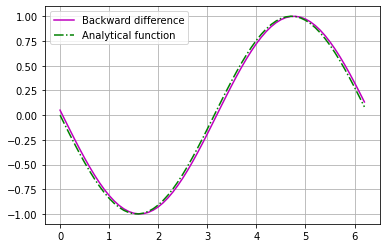

0.04997039864231646


In [2]:
def backwards_difference(x):
    return(f(x)-f(x-h))/(h)
    
def y_an(x):
    return -np.sin(x)

plt.plot(x,backwards_difference(x), "m-", label="Backward difference")
plt.plot(x,y_an(x), "g-.", label="Analytical function")
plt.grid()
plt.legend(loc="best")
plt.show()

x1=x[1:]
max_error=max(abs(y_an(x1)-backwards_difference(x1)))
print(max_error)

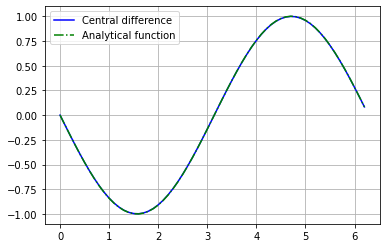

In [3]:
def central_difference(x):
    return(f(x+h)-f(x-h))/(2*h)
    
y_an=-np.sin(x)
plt.plot(x,central_difference(x), "b-", label="Central difference")
plt.plot(x,y_an, "g-.", label="Analytical function")
plt.grid()
plt.legend(loc="best")
plt.show()

Python has a command that can be used to compute finite differences directly: for a vector 𝑓
the command 𝑑=𝑛𝑝.𝑑𝑖𝑓𝑓(𝑓) produces an array 𝑑 in which the entries are the differences of the adjacent elements in the initial array 𝑓
In other words 𝑑(𝑖)=𝑓(𝑖+1)−𝑓(𝑖)

WARNING! When using the command np.diff, the size of the output is one less than the size of the input since it needs two arguments to produce a difference.


## EXAMPLE: 
Consider the function 𝑓(𝑥)=cos(𝑥). We know the derivative of cos(𝑥) is −sin(𝑥).

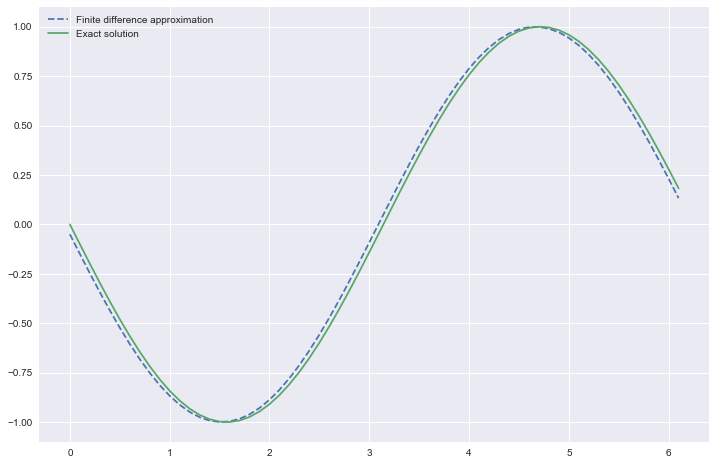

0.049984407218554114


In [5]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')

#Step size 
h=0.1
x=np.arange(0,2*np.pi,h)
y=np.cos(x)

# compute vector of forward differences
forward_diff = np.diff(y)/h 
# compute corresponding grid
x_diff = x[:-1:] 
# compute exact solution
exact_solution = -np.sin(x_diff) 


plt.figure(figsize = (12, 8))
plt.plot(x_diff, forward_diff, '--', \
         label = 'Finite difference approximation')
plt.plot(x_diff, exact_solution, \
         label = 'Exact solution')
plt.legend()
plt.show()

# Compute max error between 
# numerical derivative and exact solution
max_error = max(abs(exact_solution - forward_diff))
print(max_error)


the finite difference scheme contains a numerical error due to the approximation of the derivative. This difference decreases with the size of the discretization step, which is illustrated in the following example.

The following code computes the numerical derivative of 𝑓(𝑥)=cos(𝑥) using the forward difference formula for decreasing step sizes, ℎ. It then plots the maximum error between the approximated derivative and the true derivative versus ℎ
 as shown in the generated figure.

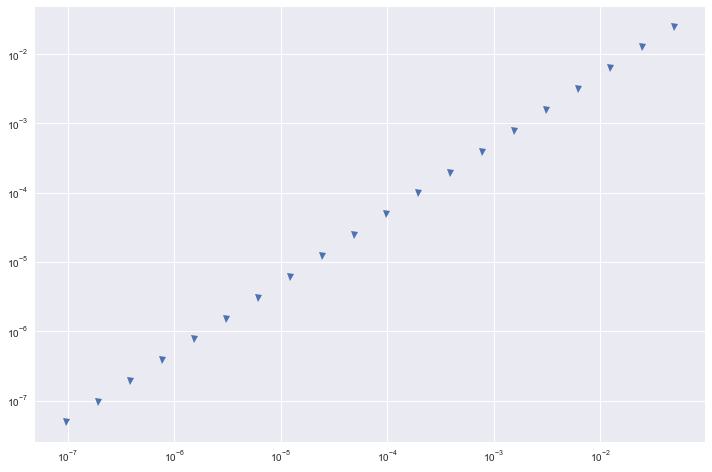

In [6]:
# define step size
h = 0.1
# define number of iterations to perform
iterations = 20 
# list to store our step sizes
step_size = [] 
# list to store max error for each step size
max_error = [] 

for i in range(iterations):
    # halve the step size
    h /= 2 
    # store this step size
    step_size.append(h) 
    # compute new grid
    x = np.arange(0, 2 * np.pi, h) 
    # compute function value at grid
    y = np.cos(x) 
    # compute vector of forward differences
    forward_diff = np.diff(y)/h 
    # compute corresponding grid
    x_diff = x[:-1] 
    # compute exact solution
    exact_solution = -np.sin(x_diff) 
    
    # Compute max error between 
    # numerical derivative and exact solution
    max_error.append(max(abs(exact_solution - forward_diff)))

# produce log-log plot of max error versus step size
plt.figure(figsize = (12, 8))
plt.loglog(step_size, max_error, 'v')
plt.show()

The slope of the line in log-log space is 1; therefore, the error is proportional to ℎ1
, which means that, as expected, the forward difference formula is 𝑂(ℎ)
.

### Exercise

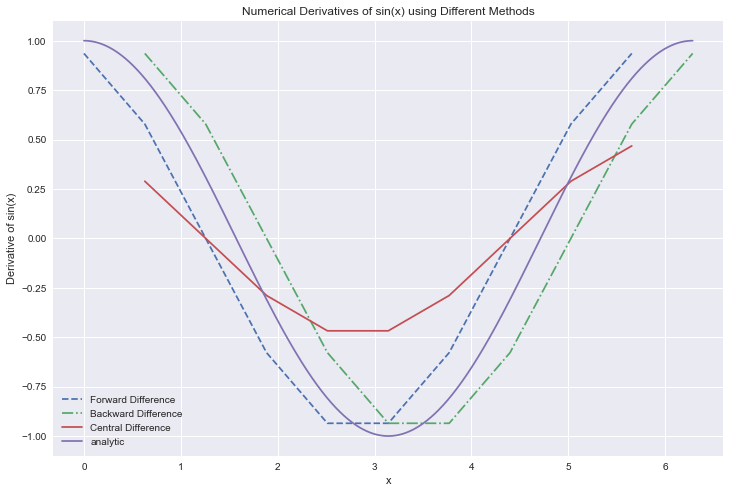

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def my_der_calc(f, a, b, N, option):
    # Ensure inputs are valid
    if  N < 10:
        raise ValueError("N must be greater than 10.")
    if a >= b:
        raise ValueError("a must be less than b.")
        
    # Create array of N evenly spaced points from a to b
    x = np.linspace(a, b, N)
    
    # Step size
    h = (b - a) / (N - 1)
    
    df = None
    X = None

    if option == 'forward':
        # Forward difference: f'(x) ≈ (f(x+h) - f(x)) / h
        X = x[:-1]  # Lose last point
        df = (f(X+h) - f(X)) / h

    elif option == 'backward':
        # Backward difference: f'(x) ≈ (f(x) - f(x-h)) / h
        X = x[1:]  # Lose first point
        df = (f(X)-f(X-h)) / h


    elif option == 'central':
        # Central difference: f'(x) ≈ (f(x+h) - f(x-h)) / (2h)
        X = x[1:-1]  # Lose first and last points
        df = (f(X+h) - f(X)) / (2 * h)

    else:
        raise ValueError("Invalid option. Choose 'forward', 'backward', or 'central'.")
    
    return df, X

# Example usage with sin(x) as the function
func = np.sin
a = 0
b = 2*np.pi
N = 11

df_forward, x_forward = my_der_calc(func, a, b, N, 'forward')
df_backward, x_backward = my_der_calc(func, a, b, N, 'backward')
df_central, x_central = my_der_calc(func, a, b, N, 'central')

# Plotting the results
plt.figure(figsize=(12, 8))
plt.plot(x_forward, df_forward, label='Forward Difference', linestyle='--')
plt.plot(x_backward, df_backward, label='Backward Difference', linestyle='-.')
plt.plot(x_central, df_central, label='Central Difference', linestyle='-')
plt.plot(x, np.cos(x), label = 'analytic')

plt.xlabel('x')
plt.ylabel("Derivative of sin(x)")
plt.title("Numerical Derivatives of sin(x) using Different Methods")
plt.legend()
plt.grid(True)
plt.show()
